Starting...


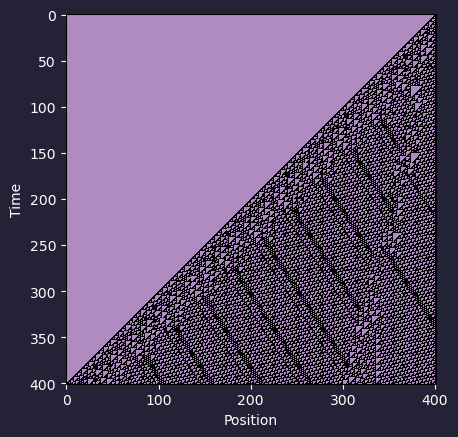

In [1]:
from CaAttributes import CaNeighbourhoods, MemoryTypes, RuleTypes
import itertools
%load_ext autoreload
%autoreload 2
from CaMemory1D import CaMemory1D
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
def collapse_sequences(sequences):
    collapsed_sequences=[]
    for sequence in sequences:
        for s in sequence:
            collapsed_sequences.append(s.sum())
    return np.array(collapsed_sequences).reshape(-1,sequence_length+1,1)
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs=None):
        if logs.get('val_accuracy') == 1:
            self.model.stop_training = True 
#Seedings and Config
 
SEED =3
print("Starting...")
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.config.threading.set_inter_op_parallelism_threads(1)
 

gridsize= 401
state=np.zeros(gridsize).tolist()
state[len(state)-1]=1
rule_110 = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Most_Frequent,initial_state=state,memory_horizon=0)

rule_110.set_rule([[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
                  [             [0],       [1],        [1],       [1],       [0],        [1],        [1],        [0]]])
rule_110.step_multiple(400)
figure,img=rule_110.render_state()

In [40]:
figure.savefig("rule_110_400steps.png", dpi=300, bbox_inches='tight')

In [ ]:
gridsize= 201
state=np.zeros(gridsize).tolist()
state[len(state)//2]=1
rule_30 = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Most_Frequent,initial_state=state,memory_horizon=0)

#rule_110.set_rule([[[0, 0, 0],[0, 0, 1],[0, 1, 0],[0, 1, 1],[1, 0, 0],[1, 0, 1],[1, 1, 0],[1, 1, 1]],
 #              [[0],      [1]         ,[0]      ,[1]     ,[1]      ,[0]      ,[0],     [1 ]]])
rule_30.set_rule([[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
                  [             [0],       [1],        [1],       [1],       [1],        [0],        [0],        [0]]])
rule_30.step_multiple(200)

In [90]:
figure.savefig("rule_30_200steps_memory0.png", dpi=300, bbox_inches='tight')

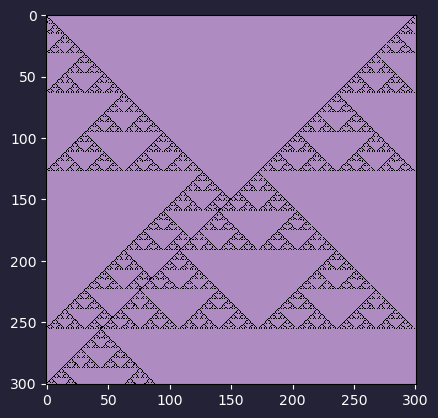

In [4]:
gridsize= 301
state=np.zeros(gridsize).tolist()
state[len(state)-1]=1
rule_110 = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Most_Frequent,initial_state=state,memory_horizon=0)

rule_110.set_rule([[[0, 0, 0],[0, 0, 1],[0, 1, 0],[0, 1, 1],[1, 0, 0],[1, 0, 1],[1, 1, 0],[1, 1, 1]],
               [[0],      [1]         ,[0]      ,[1]     ,[1]      ,[0]      ,[0],     [1 ]]])
 
rule_110.step_multiple(300)
figure,img=rule_110.render_state()

In [105]:
figure.savefig("rule_10_300steps_memory9.png", dpi=300, bbox_inches='tight')

# Class 1 #

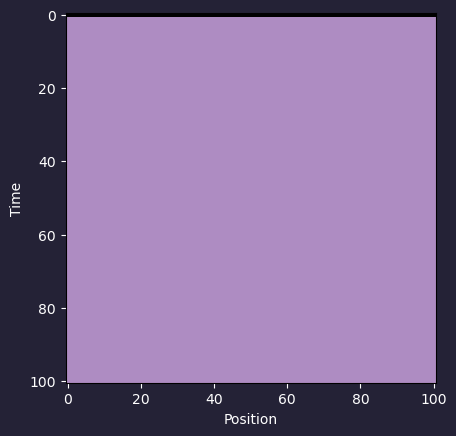

In [3]:
gridsize= 101
state=np.ones(gridsize).tolist()
state[len(state)//2]=1
ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
             memory_type=MemoryTypes.Default,initial_state=state,memory_horizon=0)
ca.set_rule_number(32)
ca.step_multiple(100)
figure,img=ca.render_state()
figure.savefig("rule32.png", dpi=300, bbox_inches='tight')

# Class 2

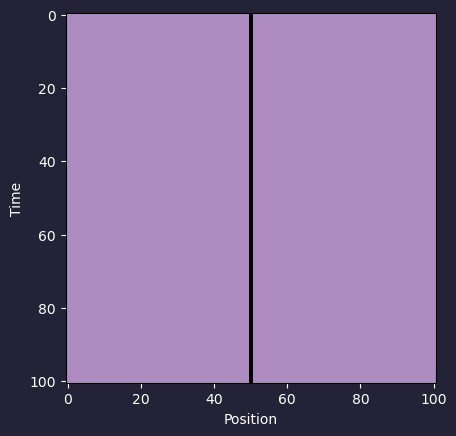

In [16]:
gridsize= 101
state=np.zeros(gridsize).tolist()
state[len(state)//2]=1
ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Default,initial_state=state,memory_horizon=0)

ca.set_rule_number(4)
 
ca.step_multiple(100)
figure,img=ca.render_state()

In [34]:
figure.savefig("rule_2_100steps.png", dpi=300, bbox_inches='tight')

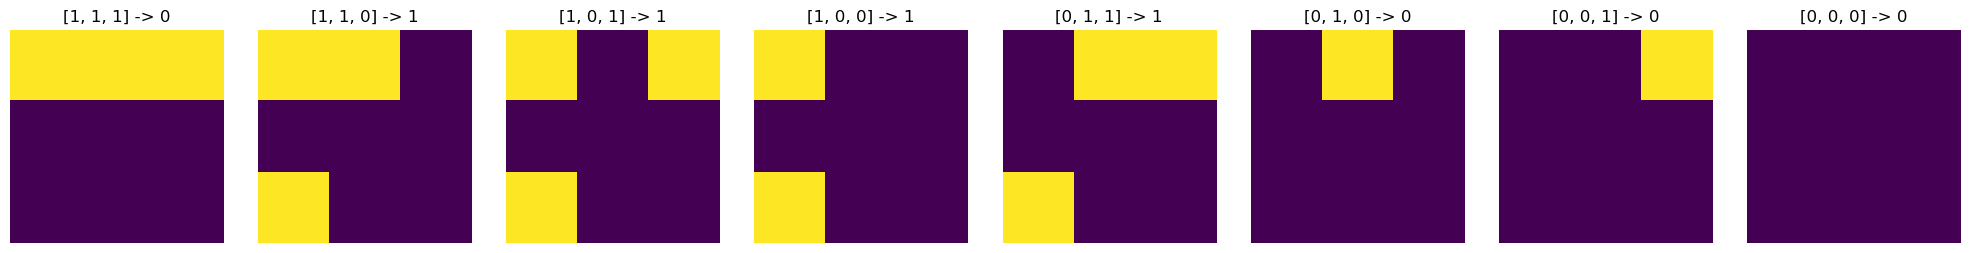

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define Rule 30
rule_number = 30
rule_binary = format(rule_number, "08b")
rule_map = [int(i) for i in reversed(rule_binary)]

# Define neighborhoods
neighborhoods = [
    [1, 1, 1],
    [1, 1, 0],
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 0]
]

fig, axarr = plt.subplots(1, 8, figsize=(20, 2.5))

for i, neighborhood in enumerate(neighborhoods):
    # Create a uniform 2D array for imshow
    img_data = np.array([
        neighborhood,
        [0, 0, 0],
        [rule_map[i], 0, 0]  # Padded with zeros
    ])
    axarr[i].imshow(img_data)
    axarr[i].axis("off")
    axarr[i].set_title(str(neighborhoods[i])+" -> " + str(rule_map[i]))

plt.tight_layout()
plt.show()
